In [ ]:
import numpy as np

#import the keras functions
from keras.preprocessing import sequence
from keras.models import Model, Sequential
from keras.layers import  Input, Embedding, Dense, LSTM
from keras.optimizers import Adam

#import the IMDB dataset
from keras.datasets import imdb

Using TensorFlow backend.


In [ ]:
num_words = 20000
maxlen = 200

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)


#Preprocess the data so the same length (padding as necessary)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)


17465344/17464789 [==============================] - 1s 0us/step


In [ ]:
def initLSTM():
  lstm = Sequential()
  lstm.add(Embedding(num_words, 128))
  lstm.add(LSTM(128, recurrent_dropout = 0.2))
  lstm.add(Dense(1, activation='sigmoid'))
  return lstm

In [ ]:
lstm = initLSTM()
lstm.summary() #print the description of the layers in the model

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [ ]:
lstm.compile(loss='binary_crossentropy',
  optimizer='adam',
   metrics=['accuracy'])

In [ ]:
lstm.fit(x=x_train, y=y_train, epochs=5, batch_size=4, validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
 2388/25000 [=>............................] - ETA: 17:41 - loss: 0.4693 - acc: 0.8003

In [ ]:
loss, acc = lstm.evaluate(x=x_test, y=y_test,batchsize=4)
print("Test accuracy: " + str(acc))

In [ ]:
#create a mapping from the index to the word
idx_to_word = {(v+3):k for k,v in imdb.get_word_index().items()}
idx_to_word.update({0:"<PAD>", 1: "<START>", 2: "<UNK>",3:"<UNUSED>"}) #first 3 indices are special tokens 

vocab_size = np.max(list(idx_to_word.keys()))


#this is a helper function - good to debug performance of model during training
def print_review(x):
    text = ""
    for idx in x:
        text += idx_to_word.get(idx, "<UNK>") + " " #if word not in dictionary it is unknown
    print(text)

In [105]:
header = [str(x) for x in range(4,0,-1)]
header
import pandas as pd
import numpy as np

df = pd.DataFrame()
for j in range(len(header)):
  a = np.random.rand(500,1)
  col = list()
  for i in range(len(a)):
    col.append(a[i][0])

  df[header[j]] = col


In [106]:
df.head()
# type(df)

,4,3,2,1
0,0.914232,0.449975,0.888174,0.817051
1,0.627660,0.975522,0.269797,0.236151
2,0.895874,0.695014,0.274204,0.203105
3,0.983079,0.308957,0.370034,0.783709
4,0.945847,0.909874,0.028680,0.956228


In [107]:
train_X = df.values
print(train_X.shape)
train_X

(500, 4)


array([[0.91423239, 0.44997525, 0.88817422, 0.81705074],
       [0.62766038, 0.97552212, 0.26979694, 0.23615149],
       [0.89587355, 0.69501373, 0.27420387, 0.20310503],
       ...,
       [0.60744799, 0.12673923, 0.42173103, 0.48998386],
       [0.65068779, 0.46760273, 0.41515708, 0.05341863],
       [0.56512672, 0.1966751 , 0.54883164, 0.47247559]])

In [109]:
train_y = train_X[:, -1]
train_y.shape

(500,)

In [110]:
print(train_X.shape)
train_X = train_X.reshape((250, 2, 4))
print(train_X.shape)

(500, 4)
(250, 2, 4)


In [111]:
# train_y = train_X[:, :-1]
train_y.shape

(500,)

In [86]:
import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
# from sklearn.cross_validation import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

In [114]:
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
#    model.add(LSTM(70))
#    model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               42000     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 42,101
Trainable params: 42,101
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
4/4 - 7s - loss: 0.4174 - val_loss: 0.2407 - 7s/epoch - 2s/step
Epoch 2/20
4/4 - 0s - loss: 0.3201 - val_loss: 0.1859 - 69ms/epoch - 17ms/step
Epoch 3/20
4/4 - 0s - loss: 0.2361 - val_loss: 0.1442 - 57ms/epoch - 14ms/step
Epoch 4/20
4/4 - 0s - loss: 0.1747 - val_loss: 0.1164 - 56ms/epoch - 14ms/step
Epoch 5/20
4/4 - 0s - loss: 0.1275 - val_loss: 0.1032 - 55ms/epoch - 14ms/step
Epoch 6/20
4/4 - 0s - loss: 0.0993 - val_loss: 0.1040 - 60ms/epoch - 15ms/step
Epoch 7/20
4/4 - 0s - loss: 0.0959 - val_loss: 0.1133 - 59ms/epoch - 15ms/step
Epoch 8/20
4/4 - 0s - loss: 0.0966 - val_loss: 0.1208 - 65ms/epoch - 16ms/step
Epoch 9/20
4/4 - 0s - loss: 0.0980 - val_loss: 0.1200 - 86ms/epoch - 21ms/step
Epoch 10/20
4/4 - 0s - loss: 0.1005 - val_loss: 0.1134 - 70ms/epoch - 17ms/step
Epoch 11/20
4/4 - 0s - loss: 0.0956 - val_loss: 0.1066 - 65ms/epoch - 16ms/step
Epoch 12/20
4/4 - 0s - loss: 0.0921 - val_loss: 0.1021 - 67ms/epoch - 17ms/step
Epoch 13/20
4/4 - 0s - loss: 0.0923 - val_loss: 0.099

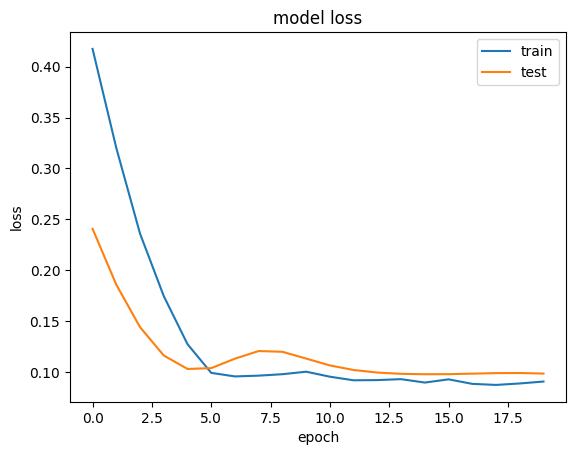

In [113]:
# fit network
history = model.fit(train_X, train_y[], epochs=20, batch_size=70, validation_split = 0.01, verbose=2, shuffle=False)

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()